<a href="https://colab.research.google.com/github/eungubipark/kaggle_project/blob/main/kaggle_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [9]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print(f'User uploaded file {fn} with length {len(uploaded[fn])} bytes')

#Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file kaggle.json with length 63 bytes


In [2]:
import os

In [7]:
os.getcwd()

'/root'

In [11]:
cd /root/.kaggle

/root/.kaggle


In [17]:
os.listdir()

['test.csv', 'sample_submission.csv', 'kaggle.json', 'train.csv']

In [13]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         67           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         94           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        836           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        165           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1810           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13725           False  
house-pr

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 61.8MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 23.0MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 56.6MB/s]


In [18]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [25]:
os.listdir()

['test.csv',
 'sample_submission.csv',
 'kaggle.json',
 'data_description.txt',
 'train.csv']

In [22]:
train.location.value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [23]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import skew

In [35]:
(nu, sigma) = norm.fit(train['SalePrice'])

In [36]:
sigma

79415.29188606751

In [70]:
num_all_vars = list(train.select_dtypes(include=[np.number]))
cat_all_vars = list(train.select_dtypes(exclude=[np.number]))

In [71]:
def find_skew(x):
  return skew(x)

skew_features = train[num_all_vars].apply(find_skew).sort_values(ascending=False)

In [68]:
train['LotFrontage'].apply(find_skew).sort_values(ascending=False)

0       0.0
974     0.0
972     0.0
971     0.0
970     0.0
       ... 
1429    NaN
1431    NaN
1441    NaN
1443    NaN
1446    NaN
Name: LotFrontage, Length: 1460, dtype: float64

In [73]:
skew_features.index

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'OpenPorchSF', 'SalePrice', 'BsmtFinSF1', 'WoodDeckSF',
       'TotalBsmtSF', 'MSSubClass', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF',
       '2ndFlrSF', 'OverallCond', 'TotRmsAbvGrd', 'HalfBath', 'Fireplaces',
       'BsmtFullBath', 'OverallQual', 'MoSold', 'BedroomAbvGr', 'GarageArea',
       'YrSold', 'FullBath', 'Id', 'GarageCars', 'YearRemodAdd', 'YearBuilt',
       'LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
      dtype='object')

In [74]:
skew_features

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
G

In [ ]:
#!kaggle competitions download -c nlp-getting-started

In [25]:
disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()

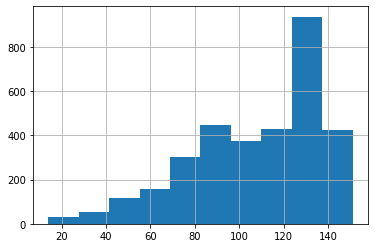

In [26]:
disaster_tweet_len.hist()

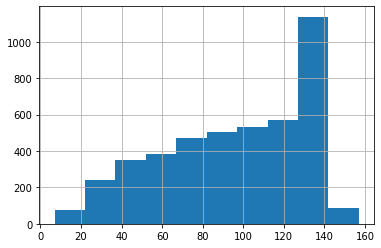

In [27]:
non_disaster_tweet_len.hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7fa3adc2d590>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa3adbee150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa3adbf5190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa3adbeec10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa3adc3e710>,
  <matplotlib.lines.Line2D at 0x7fa3adc3ebd0>]}

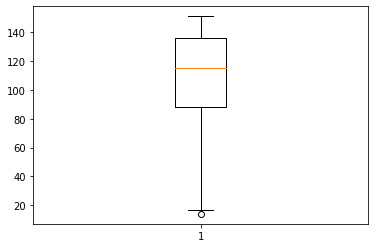

In [29]:
plt.boxplot(disaster_tweet_len)

In [32]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [36]:
disaster_tweet_keywords = dict(train[train['target']==1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target']==0]['keyword'].value_counts())

In [37]:
disaster_tweet_keywords

{'ablaze': 13,
 'accident': 24,
 'airplane%20accident': 30,
 'ambulance': 20,
 'annihilated': 11,
 'annihilation': 10,
 'apocalypse': 9,
 'armageddon': 5,
 'army': 5,
 'arson': 22,
 'arsonist': 8,
 'attack': 25,
 'attacked': 21,
 'avalanche': 4,
 'battle': 5,
 'bioterror': 22,
 'bioterrorism': 21,
 'blaze': 5,
 'blazing': 1,
 'bleeding': 5,
 'blew%20up': 2,
 'blight': 2,
 'blizzard': 4,
 'blood': 5,
 'bloody': 3,
 'blown%20up': 5,
 'body%20bag': 1,
 'body%20bagging': 5,
 'body%20bags': 1,
 'bomb': 15,
 'bombed': 19,
 'bombing': 27,
 'bridge%20collapse': 29,
 'buildings%20burning': 24,
 'buildings%20on%20fire': 28,
 'burned': 7,
 'burning': 10,
 'burning%20buildings': 21,
 'bush%20fires': 18,
 'casualties': 28,
 'casualty': 15,
 'catastrophe': 7,
 'catastrophic': 20,
 'chemical%20emergency': 15,
 'cliff%20fall': 8,
 'collapse': 15,
 'collapsed': 13,
 'collide': 3,
 'collided': 23,
 'collision': 29,
 'crash': 12,
 'crashed': 21,
 'crush': 4,
 'crushed': 4,
 'curfew': 5,
 'cyclone': 19,
 

In [40]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
disaster_wordcloud=WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').generate_from_frequencies(disaster_tweet_keywords)
non_disaster_wordcloud=WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').generate_from_frequencies(non_disaster_tweet_keywords)

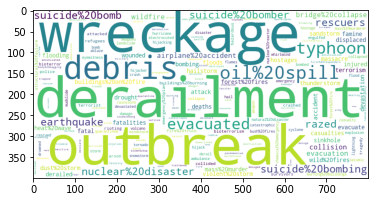

In [42]:
plt.imshow(disaster_wordcloud)

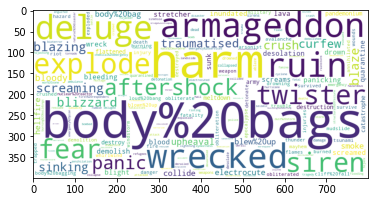

In [43]:
plt.imshow(non_disaster_wordcloud)